In [1]:
# To help you get started...
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

data_1 = pd.read_csv('exampleco_data/machine_1.csv')
data_1.columns = ['Time', '0', '1', '2', '3']
data_1['Time'] = pd.to_datetime(data_1['Time'])
data_1.set_index('Time', inplace = True)

In [2]:
data_1.head(30)

,0,1,2,3
Time,,,,
2019-01-01 00:00:00.000000000,12.588243,8.829718,-11.803474,10.083107
2019-01-01 08:00:09.603201067,10.822199,2.795246,11.560279,21.898688
2019-01-01 16:00:19.206402134,21.074661,-0.655051,-17.840580,-1.346748
2019-01-02 00:00:28.809603201,32.284431,6.544655,-13.498907,-4.281704
2019-01-02 08:00:38.412804268,28.073949,253.681988,271.983917,263.627071
2019-01-02 16:00:48.016005335,29.629862,-3.518698,3.365019,-2.995649
2019-01-03 00:00:57.619206402,38.890203,1.919590,-10.845336,-17.723077
2019-01-03 08:01:07.222407469,33.052775,3.211291,25.462723,1.146398
2019-01-03 16:01:16.825608536,25.185709,-5.489062,22.950995,-3.462269


In [3]:
# TO-DO: Create a function to plot all 4 time series plots together using subplots.
def plot_time_series(df):
    plt.figure(figsize = (15, 5))
    plt.subplot(2, 2, 1)
    plt.plot((df.index), df['0'])
    plt.subplot(2, 2, 2)
    plt.plot(df.index, df['1'])
    plt.subplot(2, 2, 3)
    plt.plot(df.index, df['2'])
    plt.subplot(2, 2, 4)
    plt.plot(df.index, df['3'])   

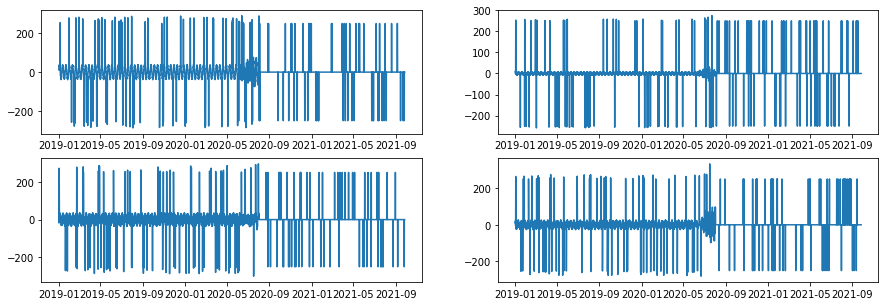

In [4]:
plot_time_series(data_1)

In [5]:
def remove_outliers(df):
    for i in range(4):
        data = df[str(i)]
        up_limit = data.mean() + (2 * data.std())
        down_limit = data.mean() - (2 * data.std())
        for j in range(len(data)): 
            if(data[j] > up_limit or data[j] < down_limit):
                if(j > 5):
                    data[j] = data[j-5:j+5].median()
                else:
                    data[j] = data[j:j+5].median()
        df[str(i)] = data  
    return df        

In [6]:
clean_data_1 = remove_outliers(data_1)

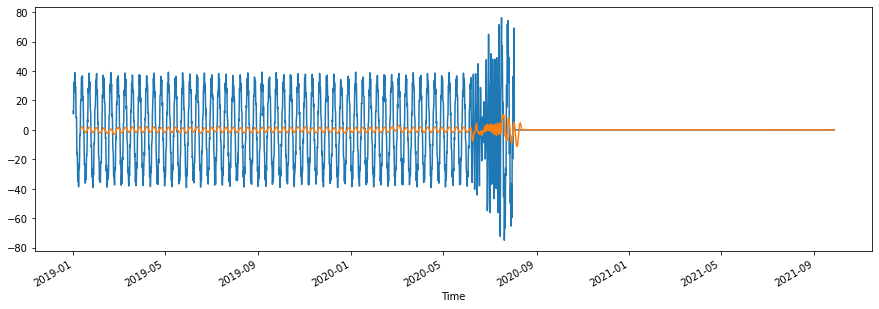

In [7]:
plt.figure(figsize = (15, 5))
clean_data_1['0'].plot()
rm = clean_data_1.rolling(window = 30).mean() 
rm['0'].plot()

12.412706770519035
12.460701551122492

ELSE

12.076099874152609
12.412706770519035

ELSE

11.61807872664154
12.076099874152609

ELSE

11.637275789843061
11.61807872664154

ELSE

12.230301800109574
11.637275789843061

ELSE

12.564562881864813
12.230301800109574

ELSE

12.425158639893189
12.564562881864813

ELSE

12.525957017296147
12.425158639893189

ELSE

12.538691343106905
12.525957017296147

ELSE

12.167139939134342
12.538691343106905

ELSE

12.243902449193397
12.167139939134342

ELSE

12.297227030357531
12.243902449193397

ELSE

11.903071914830758
12.297227030357531

ELSE

12.468854539176515
11.903071914830758

ELSE

12.282032777809581
12.468854539176515

ELSE

12.23599815171654
12.282032777809581

ELSE

12.63958902468193
12.23599815171654

ELSE

12.606170290023545
12.63958902468193

ELSE

12.41310904724814
12.606170290023545

ELSE

12.319913967067547
12.41310904724814

ELSE

12.250036441846893
12.319913967067547

ELSE

12.266492163664395
12.250036441846893

ELSE

12.195485298407105

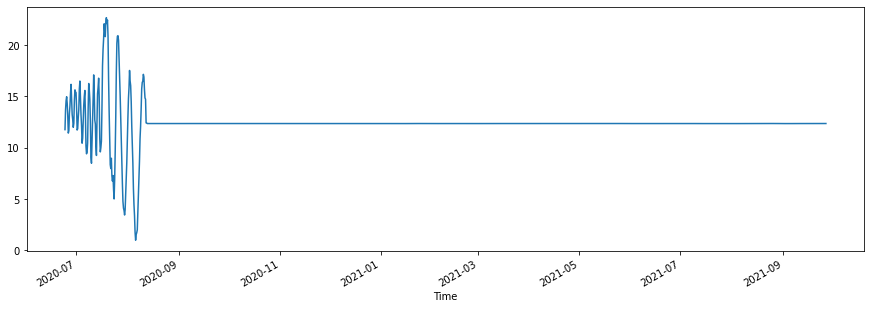

In [8]:
# Scale to a positive range 
rm['0'] = rm['0'] + abs(min(rm[30:]['0'])) + 1 

# List of window means. Initialised with the first window's mean.
window_means = [np.average(rm[30:60]['0'])]

for i in range(60, len(rm), 30):
    
    current_win_mean = rm[i:i+30]['0'].mean()
    old_win_mean = window_means[-1]
    print(current_win_mean)
    print(old_win_mean)
    print()
    if((current_win_mean < (0.25 * old_win_mean)) or (current_win_mean > (1.25 * old_win_mean))):
        print("IF")
        print(i)
        plt.figure(figsize = (15, 5))
        rm[i:]['0'].plot()
        break
    else:
        print("ELSE\n")
        window_means.append(current_win_mean)
